## Simple Linear Regression

the main aim of simple linear regression is to find the best-fitting straight line through the data points such that the sum of the squared differences between the observed values and the values predicted by the line is minimized.

Cost function[error]: Mean Squared Error (MSE)


f(observed, predicted) = (1/n) * Σ(observed_i - predicted_i)²

>  we use convergence algorithms for minimizing the cost function, such as Gradient Descent.

>  to reach gobal minima.

repeat until convergence is reached:
    compute gradients
    update parameters (slope and intercept)

    check for convergence
    theta_new = theta_old - learning_rate * gradient
    

> Multiple Linear Regression is an extension of Simple Linear Regression that allows for multiple independent variables to predict a single dependent variable.

Polynomial Regression is a type of regression analysis in which the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth degree polynomial.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df=pd.read_csv('weight-height.csv.xls')
df.drop('Gender', axis=1, inplace=True)
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


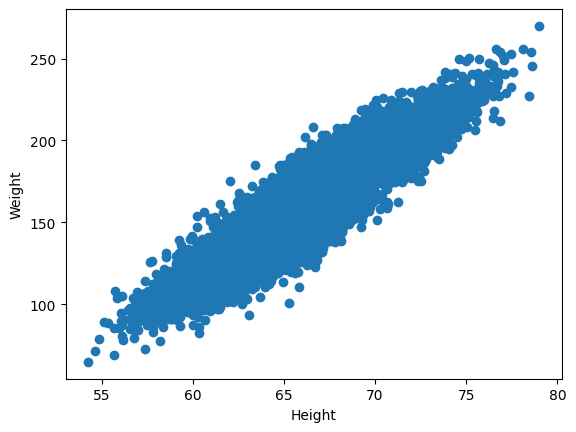

In [77]:
plt.scatter(df.Height,df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [79]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [80]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

1. Read the Data
2. EDA,FE
3. Split the Data into dependent and independent features
4. Further split the data into training and testing sets
5. Stanadard Scaling on the training and testing data
6. Model Training

In [81]:
## divide the data into dependent and independent features
x=df[['Height']]##independent feature
y=df['Weight']  ##dependent feature

In [82]:
x.shape, y.shape

((10000, 1), (10000,))

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 1), (2000, 1), (8000,), (2000,))

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler=StandardScaler()

In [88]:
x_train=scaler.fit_transform(x_train)

In [89]:
x_test  = scaler.transform(x_test)

In [90]:
x_train

array([[-1.29189725],
       [ 2.16821664],
       [ 0.5586044 ],
       ...,
       [-0.52899659],
       [ 0.70596411],
       [ 0.31963251]])

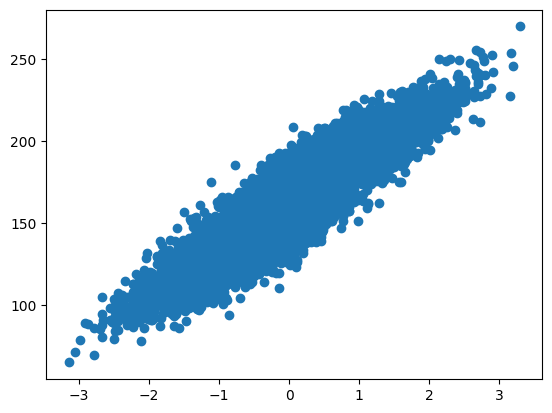

In [91]:
plt.scatter(x_train, y_train)

In [92]:
#model training
from sklearn.linear_model import LinearRegression

In [93]:
regressor=LinearRegression()

In [94]:
## Training the train data
regressor.fit(x_train, y_train)

LinearRegression()

In [95]:
regressor.intercept_

np.float64(161.3267623130613)

In [96]:
regressor.coef_

array([29.61903439])

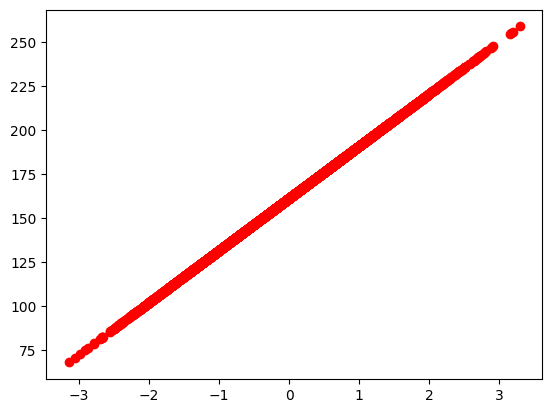

In [97]:
plt.scatter(x_train,regressor.predict(x_train), color='red')

prediction of train data

1. predicted height output=intercept + coef_(slope) * input_height
2. y_pred_train = 161.32 + 29.61 * x_train

prediction of test data

1. predicted height output=intercept + coef_(slope) * input_height
2. y_pred_test = 161.32 + 29.61 * x_test

In [98]:
# prediction of test data
y_pred_test = regressor.predict(x_test)

In [99]:
y_pred_test

array([179.25399046, 180.34848321, 161.62288801, ..., 129.20288223,
       166.78470522, 101.81227499])

In [100]:
y_test

6252    173.115813
4684    195.162042
1731    170.217451
4742    215.049660
4521    182.721452
           ...    
6412    142.067438
8285    119.967881
7853    125.179380
1095    187.573494
6929    102.469087
Name: Weight, Length: 2000, dtype: float64

### Performance Metrics MAE, MSE, RMSE

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [102]:
mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)
print('MSE:',mse)
print('MAE:',mae)
print('RMSE:',rmse)

MSE: 149.00350418448116
MAE: 9.691933801884568
RMSE: 12.206699151878905


In [103]:
## Accuracy of the model R squared and adjusted r squared
from sklearn.metrics import r2_score

In [104]:
score=r2_score(y_test,y_pred_test)
score

0.85773177770385

## Multiple linear regression

In [6]:
from sklearn.datasets import fetch_california_housing


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
california=fetch_california_housing()

In [9]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [12]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [13]:
california.target_names

['MedHouseVal']

In [14]:
california.target


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [15]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [16]:
#let prepare the dataset
dataset=pd.DataFrame(california.data,columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
dataset['price']=california.target

In [18]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
# check missing value
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [22]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

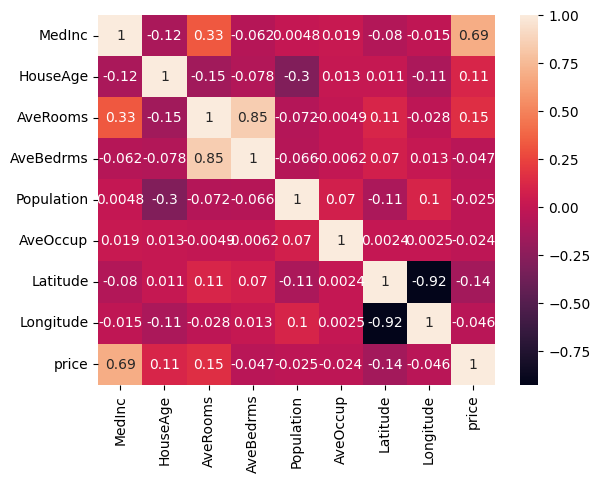

In [23]:
sns.heatmap(dataset.corr(),annot=True)

In [24]:
# indepemdent and dependent feature
x=dataset.iloc[:,:-1] #dependent feature
y=dataset.iloc[:,-1] #independent feature

In [25]:
x,y

(       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
 0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
 1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
 2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
 3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
 4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
 ...       ...       ...       ...  ...       ...       ...        ...
 20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
 20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
 20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
 20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
 20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24
 
 [20640 rows x 8 columns],
 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422
          ...  
 20635    0.781
 20636 

In [26]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)


In [35]:
x_train_scaled

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [36]:
# Model training
from sklearn.linear_model import LinearRegression

In [37]:
regressor=LinearRegression()

In [38]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [39]:
#slopes of 8 features
regressor.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [40]:
# intercept
regressor.intercept_

np.float64(2.0634768086491184)

In [43]:
# Predict the data
y_pred_test=regressor.predict(x_test_scaled)

In [44]:
 ## Performance metrics cost function

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test)) 
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.5445844745633523
0.5372372970472851
0.7379596700114122


In [45]:
# R square and Adjusted R sqaure
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.5992247966204967


In [46]:
## Adjusted R square 
# display adjusted R-squared 
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5987535043043073

### Pickling

Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it "serialises" the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [47]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regressor,open('regressor.pkl','wb'))

In [49]:
model_regressor= pickle.load(open('regressor.pkl','rb'))
model_regressor.predict(x_test_scaled)

array([2.99405341, 2.55774866, 2.32448171, ..., 3.09954263, 0.72304218,
       2.0398333 ])